## Hackerearth ML Challenge 2020 - Adopt a buddy

Problem type: Multitarget Multiclass Classification
This is an ongoing ML competition on Hackerearth (Jul 30, 2020 - Aug 23, 2020). We are required to build an model to determine type and breed of the animal based on its physical attributes and other factors. The evaluation metric being used is (the average of both f1_scores * 100).

**Kindly upvote if you find it interesting/helpful and comment your suggestions or any queries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sas
%matplotlib inline 

## Reading datasets

In [3]:
test = pd.read_csv("/kaggle/input/hackerearth-ml-challenge-pet-adoption/test.csv")
train = pd.read_csv("/kaggle/input/hackerearth-ml-challenge-pet-adoption/train.csv")

## Feature engineering

In [4]:
#storing id's in some variables so that it can be used in future for prediction
train_id = train["pet_id"]
test_id = test["pet_id"]

In [5]:
train["days"] = (pd.to_datetime(train["listing_date"]) - pd.to_datetime(train["issue_date"])).dt.days
test["days"] = (pd.to_datetime(test["listing_date"]) - pd.to_datetime(test["issue_date"])).dt.days
## here i calculated the difference in listing nd issue date store it in a column named days.

In [6]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,752
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
 11  days            18834 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.7+ MB


In [8]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category,days
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143,855.306786
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919,1096.674990
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-76.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000,119.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000,392.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000,1117.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000,8056.000000


In [9]:
test.shape

(8072, 10)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     7453 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
 9   days          8072 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 630.8+ KB


In [11]:
test.describe()

,condition,length(m),height(cm),X1,X2,days
count,7453.000000,8072.000000,8072.000000,8072.000000,8072.000000,8072.000000
mean,0.886623,0.507265,27.451163,5.254336,4.505327,856.057607
std,0.770950,0.289615,12.917903,6.505841,3.523568,1103.689752
min,0.000000,0.000000,5.010000,0.000000,0.000000,20.000000
25%,0.000000,0.260000,16.277500,0.000000,1.000000,122.000000
50%,1.000000,0.510000,27.410000,0.000000,4.000000,393.000000
75%,1.000000,0.760000,38.480000,13.000000,9.000000,1116.000000
max,2.000000,1.000000,49.990000,18.000000,9.000000,9154.000000


In [12]:
train.isnull().sum().sort_values(ascending=False)[0:2]

condition    1477
days            0
dtype: int64

In [13]:
test.isnull().sum().sort_values(ascending=False)[0:2]

condition    619
days           0
dtype: int64

#### Deleting all the columns which you feel like they are not contributing in predictions.

In [14]:
list_drop=["pet_id","issue_date","listing_date"]

for col in list_drop:
    del train[col]
    del test[col]
    

In [15]:
train.condition.value_counts(dropna=False)

1.0    6819
0.0    6281
2.0    4257
NaN    1477
Name: condition, dtype: int64

In [16]:
test.condition.value_counts(dropna=False)

1.0    2928
0.0    2685
2.0    1840
NaN     619
Name: condition, dtype: int64

In [17]:
train.condition.fillna(-1,inplace=True)

In [18]:
test.condition.fillna(-1,inplace=True)

In [19]:
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,days
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73
1,1.0,White,0.72,14.19,13,9,0.0,2,1862
2,-1.0,Brown,0.15,40.90,15,4,2.0,4,752
3,1.0,White,0.62,17.82,0,1,0.0,2,755
4,2.0,Black,0.50,11.06,18,4,0.0,1,52


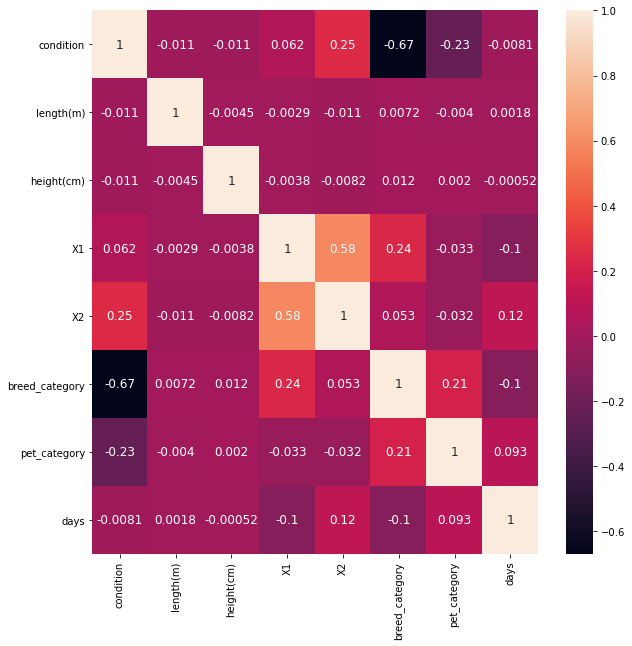

In [20]:
mat=train.corr()
fig,ax = plt.subplots(figsize = (10,10))
sas.heatmap(mat,annot = True, annot_kws={'size': 12})

- In the above co-relation heatmap we have noticed that breed_ category and pet_category is interdependent so we can use that in modeling

In [21]:
test.shape

(8072, 7)

In [22]:
test.head()

,condition,color_type,length(m),height(cm),X1,X2,days
0,0.0,Black,0.87,42.73,0,7,4404
1,1.0,Orange Tabby,0.06,6.71,0,1,174
2,1.0,Black,0.24,41.21,0,7,1999
3,1.0,Black,0.29,8.46,7,1,1148
4,1.0,Brown,0.71,30.92,0,7,463


In [23]:
Y1=train["breed_category"]
Y2=train["pet_category"]
print(Y1.shape)

(18834,)


In [24]:
train.drop("pet_category",axis=1,inplace=True)

train.drop("breed_category",axis=1,inplace=True)

 ## Marging test and train dataset

In [25]:
final=pd.concat([train,test],axis=0)

In [26]:
## Appyling one_hot_enconding to convert categorical data into numerical data
def One_hot_encoding(columns):
    final_df=final
    i=0
    for fields in columns:
        df1=pd.get_dummies(final[fields],drop_first=True)
        
        final.drop([fields],axis=1,inplace=True)
        if i==0:
            final_df=df1.copy()
        else:           
            final_df=pd.concat([final_df,df1],axis=1)
        i=i+1
       
        
    final_df=pd.concat([final,final_df],axis=1)
        
    return final_df

In [27]:
columns=["condition","color_type","X1","X2"]
# i applied it to all the columns which have categories in it
## in place of one_hot_encoding you can also use label encoder for encoding but your accuracy should be compromised

In [28]:
df_final=One_hot_encoding(columns)

In [29]:
df_final.head()

,length(m),height(cm),days,0.0,1.0,2.0,Apricot,Black,Black Brindle,Black Smoke,...,19,1,2,3,4,5,6,7,8,9
0,0.80,7.78,73,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.72,14.19,1862,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.15,40.90,752,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.62,17.82,755,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.50,11.06,52,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
df_final.shape

(26906, 89)

In [31]:
df_final.shape

(26906, 89)

## Normalizing Data

In [32]:
from sklearn import preprocessing
# Get column names first
names = df_final.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_final)
df_final = pd.DataFrame(scaled_df, columns=names)

In [33]:
## As color_type is present in both dataset have maximum no. of classes present in it
## try to analyze it that is there any class diffrence in both train and test data set

In [34]:
color_type_train=pd.get_dummies(train["color_type"])
color_type_test=pd.get_dummies(test["color_type"])

In [35]:
co1=[]
for i in color_type_train:
    if  i not in color_type_test :
        co1.append(i)
co1

['Black Tiger', 'Brown Tiger']

In [36]:
## as we can see that train dataset of two extra classes which are not present in test dataset 
## so these are not of our use 
## we can safely drop these columns which we added during applying one_hot_encoding

In [37]:
df_final.drop('Black Tiger',axis=1,inplace=True)
df_final.drop("Brown Tiger",axis=1,inplace=True)

In [38]:
df_final.columns

Index([        'length(m)',        'height(cm)',              'days',
                       0.0,                 1.0,                 2.0,
                 'Apricot',             'Black',     'Black Brindle',
             'Black Smoke',       'Black Tabby',              'Blue',
              'Blue Cream',        'Blue Merle',        'Blue Point',
              'Blue Smoke',        'Blue Tabby',         'Blue Tick',
              'Blue Tiger',             'Brown',     'Brown Brindle',
             'Brown Merle',       'Brown Tabby',              'Buff',
                  'Calico',      'Calico Point',         'Chocolate',
         'Chocolate Point',             'Cream',       'Cream Tabby',
                    'Fawn',       'Flame Point',              'Gold',
                    'Gray',        'Gray Tabby',             'Green',
             'Lilac Point',             'Liver',        'Liver Tick',
              'Lynx Point',            'Orange',      'Orange Tabby',
                    

## Changing columns names into some unique value 

In [39]:
cols = []
count = 1
for column in df_final.columns:
    cols.append(count)
    count+=1
    continue
    
df_final.columns = cols

In [40]:
df_final.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87],
           dtype='int64')

# Spliting Dataset again into Train and Test

In [41]:
df_train=df_final.iloc[:18834,:]
df_test=df_final.iloc[18834:,:]

In [42]:
X=df_train

In [43]:
df_test.shape

(8072, 87)

# Applying XgBoost
- we are going to apply Xgboost in parts 
- first we predict pet_category using model 1
- then we use that outcome to predict model 2 
- as we have seen pet category and breed category are interdependent

 # Model 1
 - for pet_category

## Hypertuning for model 1

In [44]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

In [45]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y2)

In [46]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [47]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [48]:
from xgboost import XGBClassifier

In [49]:
xgb1 = XGBClassifier()

In [50]:
random_cv_01 = RandomizedSearchCV(estimator=xgb1,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv_01.fit(x1_train,y1_train)

In [ ]:
random_cv.best_estimator_

## Training model 1 using Best estimators predicted by hypertuning

In [51]:
xgb1=XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, monotone_constraints='()',
       n_estimators=900, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
xgb1.fit(x1_train,y1_train)

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
new_feat=xgb1.predict(X)
out_01=xgb1.predict(df_test)
vald_01=xgb1.predict(x1_test)

# Model 2
- for breed_category

## Hypertuning of Parameter of Model 2

In [54]:
X2=X

In [55]:
X2["output1"]=new_feat

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_test_2=df_test

In [57]:
df_test_2["output1"]=out_01

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,Y1)

In [59]:
xgb2=XGBClassifier()

In [60]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [61]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [62]:
random_cv_02 = RandomizedSearchCV(estimator=xgb2,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv_02.fit(X2_train,Y2_train)

In [ ]:
random_cv_02.best_estimator_

## Training model 2 using Best estimators predicted by hypertuning

In [63]:
xgb2=XGBClassifier(base_score=0.25, booster='gblinear', colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=3,
       min_child_weight=4, monotone_constraints=None,
       n_estimators=1100, n_jobs=0, num_parallel_tree=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=0, scale_pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=1, verbosity=None)

In [64]:
xgb2.fit(x2_train,y2_train)

[16:10:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.25, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=3,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=1100, n_jobs=0, num_parallel_tree=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=None)

In [65]:
out_02=xgb2.predict(df_test)
vald_02=xgb2.predict(x2_test)

# Checking Accuracy

In [66]:
from sklearn.metrics  import f1_score

In [67]:
s1=f1_score(y1_test,vald_01,average='weighted')
s2=f1_score(y2_test,vald_02,average='weighted')
accuracy=100*((s1+s2)/2)
accuracy

89.90607660096674

# Submission

In [ ]:
sub_new=pd.DataFrame({
    "pet_id":test_id,
    "breed_category":out_02,
    "pet_category":out_01
})
sub_new.to_csv("sub_new_13.csv",index=False)